# *** power spectra plot from planck 2018 results ***

# import libraries

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.axes import Axes

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import*
import pickle
from time import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

In [2]:
## drive
#from google.colab import drive
#drive.mount('/content/drive/')

# directory & paths for dataset files

In [3]:
## directory
directory = 'planck18_CMB_ps_dataset/'

In [4]:
## obs-full-unbinned dataset from planck18
TT_f_fname = 'COM_PowerSpect_CMB-TT-full_R3.01.txt'
TT_f       = pd.read_fwf(directory + TT_f_fname).drop(columns=['#'], axis=1)

TE_f_fname = 'COM_PowerSpect_CMB-TE-full_R3.01.txt'
TE_f       = pd.read_fwf(directory + TE_f_fname).drop(columns=['#'], axis=1)

EE_f_fname = 'COM_PowerSpect_CMB-EE-full_R3.01.txt'
EE_f       = pd.read_fwf(directory + EE_f_fname).drop(columns=['#'], axis=1)

## obs-binned (BestFit) data set from planck18
TT_b_fname = 'COM_PowerSpect_CMB-TT-binned_R3.01.txt'
TT_b       = pd.read_fwf(directory + TT_b_fname).drop(columns=['#'], axis=1)

TE_b_fname = 'COM_PowerSpect_CMB-TE-binned_R3.02.txt'
TE_b       = pd.read_fwf(directory + TE_b_fname).drop(columns=['#'], axis=1)

EE_b_fname = 'COM_PowerSpect_CMB-EE-binned_R3.02.txt'
EE_b       = pd.read_fwf(directory + EE_b_fname).drop(columns=['#'], axis=1)

In [5]:
## theory-unbinned dataset from planck18
theory_fname = 'COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt'
theory       = pd.read_fwf(directory + theory_fname).drop(columns=['#','BB','PP'], axis = 1)
theory.rename(columns = {'L':'l'}, inplace = True)
theory['l']  = range(2, len(theory['TT'])+2)

In [6]:
calPlanck = 0.1000442E+01

theory['TT'] /= calPlanck**2
theory['TE'] /= calPlanck**2
theory['EE'] /= calPlanck**2

In [7]:
## defs. for plot
def Func(ax, s, f):
    for axis in ax_ll:
        axis.set_xscale('log')
        axis.set_xlim([2, 30])
        axis.spines['right'].set_visible(False)
        axis.set_xticks([2, 10, 30])
        axis.set_xticklabels(['2','10','30'])
        
    for axis in ax_hl:
        axis.set_xlim([30, 2550])
        axis.spines['left'].set_visible(False)
        
    for axis in ax[0]: 
        axis.set_xticks([])
        axis.set_xticklabels([])
        axis.legend(loc='upper right', fontsize=9)
        
    for axis in ax[1]: 
        axis.axhline(0, color='cyan', lw=1.3) 
        axis.legend(loc='upper right', fontsize=9)        
    
    ax_hl[0].axvline(30, color='0.5', linestyle='--', lw=1.3)      
    ax_hl[1].axvline(30, color='0.5', linestyle='--', lw=1.3) 
        
    ax_hl[0].yaxis.set_ticks_position('right')  
    ax_hl[1].yaxis.set_ticks_position('right')      

# plot

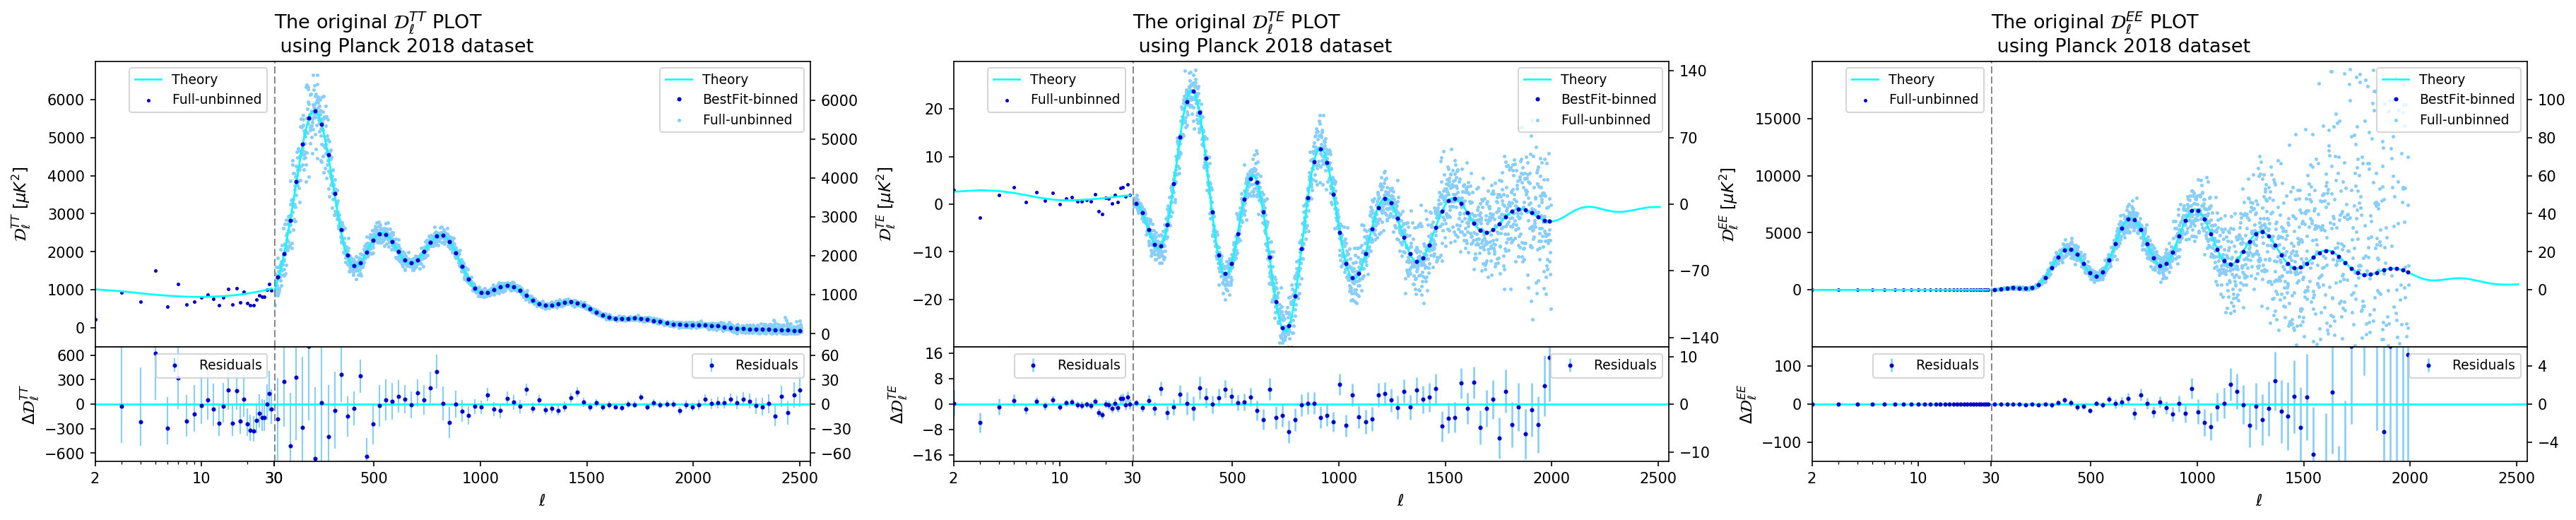

In [8]:
## plot
fig = plt.subplots(2, 3, figsize=(27, 5), dpi=150, sharex='col', sharey='row', 
                   gridspec_kw={'hspace':0.0, 'wspace':0.2})
d   = 1/40

##**********************************************
## For TT-ps plot
##**********************************************
s, f = 1.0, 11.0
gs1  = GridSpec(nrows=7, ncols=4)
gs1.update(left=s*d, right=f*d, wspace=0.0, hspace=0.0)

ax1 = plt.subplot(gs1[0:5, 0:1])
ax2 = plt.subplot(gs1[0:5, 1:4])
ax3 = plt.subplot(gs1[5:8, 0:1])
ax4 = plt.subplot(gs1[5:8, 1:4])
ax  = np.array([[ax1, ax2], [ax3, ax4]])

ax_ll = ax[:, 0]
ax_hl = ax[:, 1]

ax_ll[0].plot(theory['l'].iloc[:28],  theory['TT'].iloc[:28],    color='cyan', lw=1.3, alpha=1, label='Theory')
ax_ll[0].scatter(TT_f['l'].iloc[:28], TT_f['Dl'].iloc[:28],      s=2.0, color='mediumblue', alpha=1, label='Full-unbinned')
ax_hl[0].plot(theory['l'].iloc[28:],  theory['TT'].iloc[28:],    color='cyan', lw=1.3, alpha=1, label='Theory')
ax_hl[0].scatter(TT_f['l'].iloc[28:], TT_f['Dl'].iloc[28:],      s=2.0, color='lightskyblue', alpha=1, label='Full-unbinned')
ax_hl[0].plot(TT_b['l'],              TT_b['BestFit'],           'o',   color='mediumblue', ms=1.9, alpha=1, label='BestFit-binned')

ax_ll[1].errorbar(TT_f['l'].iloc[:28], TT_f['Dl'].iloc[:28]-theory['TT'].iloc[:28],
                  yerr=[TT_f['-dDl'].iloc[:28], TT_f['+dDl'].iloc[:28]], ecolor='lightskyblue', lw=1.0,
                  fmt='o', color='mediumblue', ms=1.9, alpha=1, label='Residuals')
ax_hl[1].errorbar(TT_b['l'], TT_b['BestFit']-TT_b['Dl'],
                  yerr=[TT_b['-dDl'], TT_b['+dDl']], ecolor='lightskyblue', lw=1.0,
                  fmt='o', color='mediumblue', ms=1.9, alpha=1, label='Residuals')

ax_ll[1].set_xlim([2, 30])
ax_ll[1].set_xticks([2, 10, 30])
ax_hl[1].set_xlim([30, 2550])
ax_hl[1].set_xticks([30, 500, 1000, 1500, 2000, 2500, 2550])
ax_hl[1].set_xticklabels(['30','500', '1000', '1500', '2000', '2500'])

ax_ll[0].set_ylim([-500, 7000])
ax_ll[0].set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])

ax_ll[1].set_ylim([-700, 700])
ax_ll[1].set_yticks([-600, -300, 0, 300, 600])
ax_hl[1].set_ylim([-70, 70])
ax_hl[1].set_yticks([-60, -30, 0, 30, 60])

ax_hl[0].set_title('The original $\mathcal{D}_{\ell}^{TT}$ PLOT \n using Planck 2018 dataset', loc='left', fontsize=13)
ax_hl[1].set_xlabel('$\ell$', fontsize=11, labelpad=5)
ax_ll[0].set_ylabel('$\mathcal{D}_{\ell}^{TT} \\ [\mu K^{2}] $', fontsize=11, labelpad=10)
ax_ll[1].set_ylabel('$\Delta \mathcal{D}_{\ell}^{TT}$', fontsize=11, labelpad=2)

Func(ax, s, f)
##**********************************************


##**********************************************
## For TE-ps plot
##**********************************************
s, f = 13.0, 23.0
gs2  = GridSpec(nrows=7, ncols=4)
gs2.update(left=s*d, right=f*d, wspace=0.0, hspace=0.0)

ax1 = plt.subplot(gs2[0:5, 0:1])
ax2 = plt.subplot(gs2[0:5, 1:4])
ax3 = plt.subplot(gs2[5:8, 0:1])
ax4 = plt.subplot(gs2[5:8, 1:4])
ax  = np.array([[ax1, ax2], [ax3, ax4]])

ax_ll = ax[:, 0]
ax_hl = ax[:, 1]

ax_ll[0].plot(theory['l'].iloc[:28],  theory['TE'].iloc[:28],    color='cyan', lw=1.3, alpha=1, label='Theory')
ax_ll[0].scatter(TE_f['l'].iloc[:28], TE_f['Dl'].iloc[:28],      s=2.0, color='mediumblue', alpha=1, label='Full-unbinned')
ax_hl[0].plot(theory['l'].iloc[28:],  theory['TE'].iloc[28:],    color='cyan', lw=1.3, alpha=1, label='Theory')
ax_hl[0].scatter(TE_f['l'].iloc[28:], TE_f['Dl'].iloc[28:],      s=2.0, color='lightskyblue', alpha=1, label='Full-unbinned')
ax_hl[0].plot(TE_b['l'],              TE_b['BestFit'],           'o',   color='mediumblue', ms=1.9, alpha=1, label='BestFit-binned')

ax_ll[1].errorbar(TE_f['l'].iloc[:28], TE_f['Dl'].iloc[:28]-theory['TE'].iloc[:28],
                  yerr=[TE_f['-dDl'].iloc[:28], TE_f['+dDl'].iloc[:28]], ecolor='lightskyblue', lw=1.3,
                  fmt='o', color='mediumblue', ms=1.9, alpha=1, label='Residuals')
ax_hl[1].errorbar(TE_b['l'], TE_b['BestFit']-TE_b['Dl'],
                  yerr=[TE_b['-dDl'], TE_b['+dDl']], ecolor='lightskyblue', lw=1.3,
                  fmt='o', color='mediumblue', ms=1.9, alpha=1, label='Residuals')

ax_ll[1].set_xlim([2, 30])
ax_ll[1].set_xticks([2, 10, 30])
ax_hl[1].set_xlim([30, 2550])
ax_hl[1].set_xticks([500, 1000, 1500, 2000, 2500])

ax_ll[0].set_ylim([-30, 30])
ax_ll[0].set_yticks([-20, -10, 0, 10, 20])
ax_hl[0].set_ylim([-150, 150])
ax_hl[0].set_yticks([-140, -70, 0, 70, 140])

ax_ll[1].set_ylim([-18, 18])
ax_ll[1].set_yticks([-16, -8, 0, 8, 16])
ax_hl[1].set_ylim([-12, 12])
ax_hl[1].set_yticks([-10, 0, 10])

ax_hl[0].set_title('The original $\mathcal{D}_{\ell}^{TE}$ PLOT \n using Planck 2018 dataset', loc='left', fontsize=13)
ax_hl[1].set_xlabel('$\ell$', fontsize=11, labelpad=5)
ax_ll[0].set_ylabel('$\mathcal{D}_{\ell}^{TE} \\ [\mu K^{2}] $', fontsize=11, labelpad=10)
ax_ll[1].set_ylabel('$\Delta \mathcal{D}_{\ell}^{TE}$', fontsize=11, labelpad=2)

Func(ax, s, f)
##**********************************************


##**********************************************
## For EE-ps plot
##**********************************************
s, f = 25.0, 35.0
gs3  = GridSpec(nrows=7, ncols=4)
gs3.update(left=s*d, right=f*d, wspace=0.0, hspace=0.0)

ax1 = plt.subplot(gs3[0:5, 0:1])
ax2 = plt.subplot(gs3[0:5, 1:4])
ax3 = plt.subplot(gs3[5:8, 0:1])
ax4 = plt.subplot(gs3[5:8, 1:4])
ax  = np.array([[ax1, ax2], [ax3, ax4]])

ax_ll = ax[:, 0]
ax_hl = ax[:, 1]

ax_ll[0].plot(theory['l'].iloc[:28],  theory['EE'].iloc[:28],    color='cyan', lw=1.3, alpha=1, label='Theory')
ax_ll[0].scatter(EE_f['l'].iloc[:28], EE_f['Dl'].iloc[:28],      s=2.0, color='mediumblue', alpha=1, label='Full-unbinned')
ax_hl[0].plot(theory['l'].iloc[28:],  theory['EE'].iloc[28:],    color='cyan', lw=1.3, alpha=1, label='Theory')
ax_hl[0].scatter(EE_f['l'].iloc[28:], EE_f['Dl'].iloc[28:],      s=2.0, color='lightskyblue', alpha=1, label='Full-unbinned')
ax_hl[0].plot(EE_b['l'],              EE_b['BestFit'],           'o',   color='mediumblue', ms=1.9, alpha=1, label='BestFit-binned')

ax_ll[1].errorbar(EE_f['l'].iloc[:28], EE_f['Dl'].iloc[:28]-theory['EE'].iloc[:28],
                  yerr=[EE_f['-dDl'].iloc[:28], EE_f['+dDl'].iloc[:28]], ecolor='lightskyblue', lw=1.3,
                  fmt='o', color='mediumblue', ms=1.9, alpha=1, label='Residuals')
ax_hl[1].errorbar(EE_b['l'], EE_b['BestFit']-EE_b['Dl'],
                  yerr=[EE_b['-dDl'], EE_b['+dDl']], ecolor='lightskyblue', lw=1.3,
                  fmt='o', color='mediumblue', ms=1.9, alpha=1, label='Residuals')

ax_ll[1].set_xlim([2, 30])
ax_ll[1].set_xticks([2, 10, 30])
ax_hl[1].set_xlim([30, 2550])
ax_hl[1].set_xticks([500, 1000, 1500, 2000, 2500])

ax_ll[0].set_ylim([-5000, 20000])
ax_ll[0].set_yticks([0, 5000, 10000, 15000])
ax_hl[0].set_ylim([-30, 120])
ax_hl[0].set_yticks([0, 20, 40, 60, 80, 100])

ax_ll[1].set_ylim([-150, 150])
ax_ll[1].set_yticks([-100, 0, 100])
ax_hl[1].set_ylim([-6, 6])
ax_hl[1].set_yticks([-4, 0, 4])

ax_hl[0].set_title('The original $\mathcal{D}_{\ell}^{EE}$ PLOT \n using Planck 2018 dataset', loc='left', fontsize=13)
ax_hl[1].set_xlabel('$\ell$', fontsize=11, labelpad=5)
ax_ll[0].set_ylabel('$\mathcal{D}_{\ell}^{EE} \\ [\mu K^{2}] $', fontsize=11, labelpad=10)
ax_ll[1].set_ylabel('$\Delta \mathcal{D}_{\ell}^{EE}$', fontsize=11, labelpad=2)

Func(ax, s, f)
##**********************************************



#plt.savefig('power_spectra_planck2018.pdf', bbox_inches='tight', dpi=150)